# Importamos las librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujary guardas gráficas de redes y funciones
import matplotlib.pyplot as plt

# Creación de la red

**ACTIVIDAD 1** Complete la siguiente lista de enlaces para representar la red de amistades de la Práctica 1.
Python distingue entre mayúsculas y minúsculas. 

In [2]:
lista_enlaces =  [
    ("Alicia","Beto"),
    ("Carlos","Alicia"),
    ("Alicia","David"),
    ("Alicia","Carmen"),
    ("Alicia","Monica"),
    ("Beto","Jorge"),
    ("Jorge","Enrique"),
    ("Enrique","Rosa"),
    ("Rosa","Jorge"),
    ("Enrique","Irene"),
    ("Irene","Jorge"),
    ("Irene","Rosa"),
    ("Carmen","Monica"),
    ("David","Carlos"),
    ("Carlos","Monica"),
    ("Carmen","Irene")
]

Creamos la red y la almacenamos en la variable G

In [3]:
G = nx.Graph(lista_enlaces)

# Informacion de la red
El siguiente codigo calcula la cantidad de nodos, enlaces y el diámetro de la red. Almacena estos dato en las variables n, m y d, repectivamente. Posteriormente se imprime la información

In [4]:
# nodos
n = len(nx.nodes(G))
# enlaces
m = len(nx.edges(G))
# diametro
d = nx.diameter(G)
print("Informacion de la red: \n- nodos = " + str(n) +
      "\n- enlaces = " + str(m) +
      "\n- diámetro = " + str(d) )

Informacion de la red: 
- nodos = 10
- enlaces = 16
- diámetro = 4


Los anteriores datos se pueden obtener usando la función info de networkx

In [5]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10\nNumber of edges: 16\nAverage degree:   3.2000'

## Dibujamos y guardamos la red

Dibujamos la red con nodos rosas y mostrando las etiquetas de los nodos. Después, guardamos la red en el archivo amigos.png

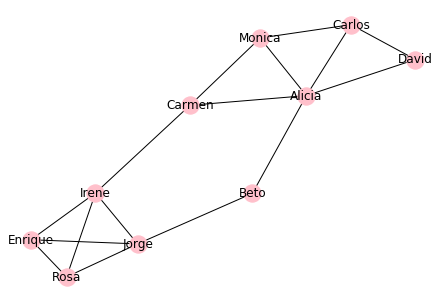

In [6]:
nx.draw(G,with_labels=True,node_color="pink")
plt.savefig("amigos.png")

**ACTIVIDAD 2** Dibuje la red con nodos azules y sin mostrar las etiquetas de nodos 

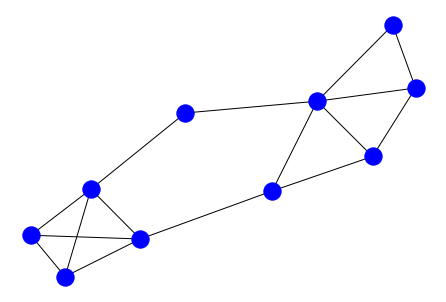

In [7]:
nx.draw(G,node_color="blue")

**ACTIVIDAD 3** Dibuje la red con nodos verdes y mostrando las etiquetas de nodos 

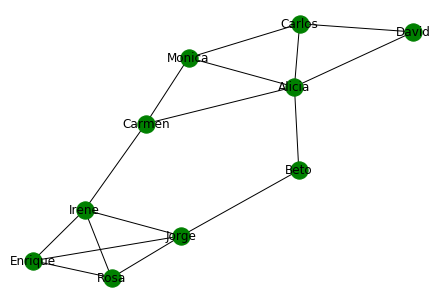

In [8]:
nx.draw(G,with_labels=True,node_color="green")

# Nodos y enlaces

## Nodos

Guardamos la lista de nodos en la variable nodos y la MOSTRAMOS

In [9]:
nodos = nx.nodes(G)
nodos

NodeView(('Alicia', 'Beto', 'Carlos', 'David', 'Carmen', 'Monica', 'Jorge', 'Enrique', 'Rosa', 'Irene'))

Guardamos el tamaño de la lista de enlaces en la variable n y la MOSTRAMOS

In [10]:
n = len(nodos)
n

10

## Enlaces

**ACTIVIDAD 4** Guarde la lista de enlaces en una variable enlaces y muestrela 

In [11]:
enlaces = nx.edges(G)                        #Asignacion de lista
print("Enlaces de la red:\n"+ str(enlaces))  #Impresion de lista

Enlaces de la red:
[('Alicia', 'Beto'), ('Alicia', 'Carlos'), ('Alicia', 'David'), ('Alicia', 'Carmen'), ('Alicia', 'Monica'), ('Beto', 'Jorge'), ('Carlos', 'David'), ('Carlos', 'Monica'), ('Carmen', 'Monica'), ('Carmen', 'Irene'), ('Jorge', 'Enrique'), ('Jorge', 'Rosa'), ('Jorge', 'Irene'), ('Enrique', 'Rosa'), ('Enrique', 'Irene'), ('Rosa', 'Irene')]


**ACTIVIDAD 5** Guarde el tamaño de la lista de enlaces en una variable m y muestrela

In [12]:
m = len(enlaces)       #Asignacion
print("Numero de enlaces en la red: m = "+ str(m))

Numero de enlaces en la red: m = 16


# Distancias y caminos

## Distancia y camino entre 2 personas
La distancia entre 2 nodos es el la longitud del camino más corto
### Beto y Carlos
Calculamos uno de los caminos mas cortos entre Carlos e Irene y lo IMPRIMOS

In [13]:
camino = nx.shortest_path(G,"Beto","Carlos")
print("El camino más corto entre Beto y Carlos " + str(camino))

El camino más corto entre Beto y Carlos ['Beto', 'Alicia', 'Carlos']


Calculamos la distancia entre Beto y Carlos y la IMPRIMOS

In [14]:
distancia = nx.shortest_path_length(G,"Beto","Carlos")
print("La distancia entre Beto y Carlos es " + str(distancia))

La distancia entre Beto y Carlos es 2


Calculamos TODOS los caminos mas cortos entre Carlos y Beto, los guardamos en la variable caminos

In [15]:
caminos = nx.all_shortest_paths(G,"Carlos","Beto")

Con ayuda de un ciclo for imprimos todos los caminos entre Carlos y Beto

In [16]:
for camino in caminos: 
    print("El camino más corto entre Carlos y Beto " + str(camino))

El camino más corto entre Carlos y Beto ['Carlos', 'Alicia', 'Beto']


## Funcion para mostrar los caminos (más cortos) y distancia

**ACTIVIDAD 6** Cree una función que recibe como parametros los nodos: nodo1 y nodo2 e imprime los caminos mas cortos entre ellos. La funcion devuelve la distancia entre el nodo1 y el nodo2

In [17]:
#Se asume que la red puede ser local
''' Funcion que imprime los caminos mas cortos entre dos nodos
    In:  Grafo a fin de dar portabilidad en futuras practicas
         NodoA y NodoB
    Out: Distancia entre nodos  '''
def CaminosDistancia(Red, nodoA, nodoB):
    caminof = nx.all_shortest_paths(Red, nodoA, nodoB)
    print("Caminos encontrados entre "+ nodoA + " - "+ nodoB )  
    for i in caminof:                  #desde primer camino hasta el ultimo:
        print("Camino: "+ str(i))
    return nx.shortest_path_length(Red, nodoA, nodoB)

**ACTIVIDAD 7** Llame a la función creada para mostrar los caminos mas cortos y la distnacia entre Carlos e Irene y entre Carlos y Enrique

In [18]:
#Calculo de distancias entre Carlos e Irene
DistanciaCarIR = CaminosDistancia(G, "Carlos", "Irene")        #llamado de funcion
print("Distancia entre Carlos e Irene: "+str(DistanciaCarIR) +"\n")

#Calculo de distancias entre Carlos e Enrique
DistanciaCarEn = CaminosDistancia(G, "Carlos", "Enrique")      #llamado de funcion
print("Distancia entre Carlos y Enrique: "+str(DistanciaCarEn))

Caminos encontrados entre Carlos - Irene
Camino: ['Carlos', 'Alicia', 'Carmen', 'Irene']
Camino: ['Carlos', 'Monica', 'Carmen', 'Irene']
Distancia entre Carlos e Irene: 3

Caminos encontrados entre Carlos - Enrique
Camino: ['Carlos', 'Alicia', 'Beto', 'Jorge', 'Enrique']
Camino: ['Carlos', 'Alicia', 'Carmen', 'Irene', 'Enrique']
Camino: ['Carlos', 'Monica', 'Carmen', 'Irene', 'Enrique']
Distancia entre Carlos y Enrique: 4


## Funcion para calcular la distancia promedio y diametro de una red

**ACTIVIDAD 8** Cree una funcion recibe como parametros una red G, que imprima el diámetro y la distancia promedio de G. La funcion debe devolver la distancia promedio de G

In [19]:
#Asumiendo que el grafo puede ser local
''' Funcion que imprime el diametro y la distancia de un grafo G
    In:  Grafo a fin de dar portabilidad en futuras practicas         
    Out: Distancia promedio  '''
def CalcDistpDiam(Red):
    DistProm = nx.average_shortest_path_length(Red)           #calculo de distancia tras llamado de funcion
    print("Diametro de grafo: " + str(nx.diameter(Red))+ "\nDistancia promedio: " + "{:.3f}".format(DistProm))   #impresion con formato
    return DistProm

**ACTIVIDAD 9** Llame a la función de la actividad 8, para imprimir el diámetro y la distancia de la red creada

In [20]:
CalcDistpDiam(G)

Diametro de grafo: 4
Distancia promedio: 2.022


2.022222222222222

# Grado nodal
Indica el número de enlaces de un nodo

**ACTIVIDAD 10** Cree una función que reciba el parametro nodo e imprima el nombre del nodo y su grado nodal

In [21]:
#Asumiendo que el grafo puede ser local
''' Funcion que imprime el nodo de un grafo y calcula su grado nodal
    In:  Grafo a fin de dar portabilidad en futuras practicas
         Nodo a calcular grado
    Out:                             '''
def GradoNodo(Red, Nodo):
    print("Nodo: " + str(Nodo)+ ",\tgrado nodal: " + str(nx.degree(Red,Nodo)))


**ACTIVIDAD 11** Itere todos los nodos de la red y para cada uno de ellos llame a la función de la actividad 10 para imprimir su grado nodal

In [22]:
for iterador in nx.nodes(G):       #Para el primer nodo en el grado, hasta el ultimo
    GradoNodo(G,iterador)          #Calcula e imprime el grado nodal

Nodo: Alicia,	grado nodal: 5
Nodo: Beto,	grado nodal: 2
Nodo: Carlos,	grado nodal: 3
Nodo: David,	grado nodal: 2
Nodo: Carmen,	grado nodal: 3
Nodo: Monica,	grado nodal: 3
Nodo: Jorge,	grado nodal: 4
Nodo: Enrique,	grado nodal: 3
Nodo: Rosa,	grado nodal: 3
Nodo: Irene,	grado nodal: 4


## Distribucion de grados

Calculamos la distribución de grados

In [23]:
dist_grados = nx.degree_histogram(G)
print(dist_grados)

[0, 0, 2, 5, 2, 1]


El resultado anterior nos indica que hay

- 0 nodos de grado 0
- 0 nodos de grado 1
- 2 nodos de grado 2
- 5 nodos de grado 3
- 2 nodos de grado 2
- 1 nodo de grado 1

**ACTIVIDAD 12** Cree una función que se llame graficar_distr_grado, la función debe recibir como parámetro una red G. La función calcula la distribución de grados, la grafica y la almacena en una imágen dist_grado.png. Finalmente la función devuelve la lista que almacena la distribución de grado. 

Para realizar la grafica utilice la librería matplotlib. La grafica debe titularse "Distribución de grados", el eje x se debe etiquetar como "grado" y el eje y como "número de nodos"

[0, 0, 2, 5, 2, 1]

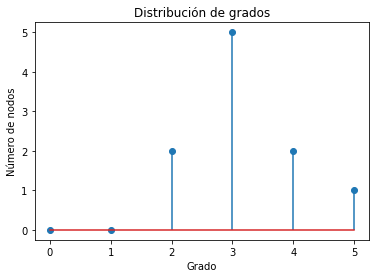

In [24]:
''' Funcion que genera grafica de distribucion de grados
    In:  Grafo sobre el cual se genera la distribucion        
    Out: Lista con distribucion de grados            '''
def graficar_distr_grado(Red):
    DistGrados = nx.degree_histogram(Red)           #Lista de distribucion de grados
    plt.title("Distribución de grados")                   #Configuracion de titulo de grafica
    plt.ylabel('Número de nodos')                         #Configuracion de etiqueta de eje y
    plt.xlabel('Grado')                                   #Configuracion de etiqueta de eje X
    plt.stem(DistGrados,use_line_collection = True)       #Graficado de grafica de distribucion, usando el argumento coleccion de linea
    plt.savefig("dist_grado.png")
    return DistGrados
    
#Llamado de funcion   
graficar_distr_grado(G)

## Grado promedio de la red

**ACTIVIDAD 13** Cree una función que se llame grado_promedio de la red, la función debe recibir como parámetro una red G. La función calcula el grado promedio de la red, lo imprime y lo devuleve

In [25]:
''' Funcion que imprime y calcula el grado promedio de un grafo
    In:  Grafo         
    Out: Grado promedio del grafo               '''
def grado_promedio(Red):
    SumaGrados = 0
    for i in nx.nodes(Red):
        SumaGrados += nx.degree(Red,i)          #Sumatoria de grado nodal de grafo
    PromGrados = SumaGrados/len(nx.nodes(Red))  #Calculo de promedio
    print("Grado promedio del grafo: "+ str(PromGrados))
    return PromGrados


**ACTIVIDAD 14** Llame a la función anterior pasandole como parámetro la gráfica G

In [26]:
#Llamado de funcion 
grado_promedio(G)

Grado promedio del grafo: 3.2


3.2

# Densidad de la red
Proporcion de nodos que tiene con respecto a los que podría tener (es decir los que tiene la red completa)

## Red completa

Usando NetworkX creamos una red completa de 10 nodos (recuerde que la variable n se declaro más arriba guarda el numero 10) y la almacena en la variable Kn

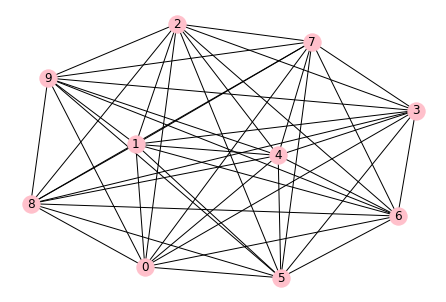

In [27]:
n1 = 10                                          #Nueva variable temporal para generacion de grafo completo
kn = nx.complete_graph(n1)                       #Generacion de grafo
nx.draw(kn,with_labels=True,node_color="pink")   
plt.savefig("completa.png")

 **ACTIVIDAD 8** Calcule la densidad de la red G de 10 nodos usando la red Kn que acaba de crear

In [28]:
''' Funcion que calcula la densidad de un grafo
    usando la definicion de densidad:
       D = NumEnlaces/NumMaxEnlacesPosibles  
    In:  Grafo 
    Out  Densidad de grafo               '''
def DensidadGrafo(Red):
    EnlacesMax = (len(nx.nodes(Red)) * (len(nx.nodes(Red))-1)) / 2    #Calculo de enlaces maximos posibles
    return len(nx.edges(Red))/EnlacesMax

print("Calculo de densidad por definicion: "+ str(DensidadGrafo(kn)))

Calculo de densidad por definicion: 1.0


Calculamos la densidad usando NetworkX

In [29]:
densidad = nx.density(kn)
print("La densidad de la red es " + str(densidad))

La densidad de la red es 1.0
